In [1]:
import dynamoon as dm
import matplotlib.pyplot as plt

In [2]:
star = dm.star(1, 1, [0.5, 0.5])
planet = dm.rock(1, 1)
moon = dm.rock(0.3, 0.9)

In [3]:
t = np.linspace(2, 20, 100000)
sys = dm.system(star, planet, moon)
sys.set_planet_orbit(t0=4, e=0.2, P=100, Omega=0, w=0, i=89.5)
sys.set_moon_orbit(t0=2, e=0.1, P=1, Omega=0, w=0, i=87)

CPU times: user 70.1 ms, sys: 6.33 ms, total: 76.4 ms
Wall time: 79.5 ms


(3.8, 4.2)

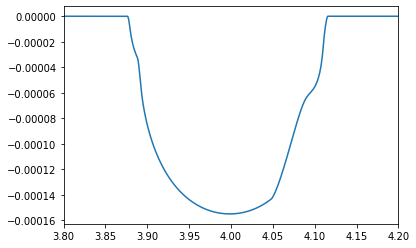

In [4]:
%time flux = sys.flux(t)
plt.plot(t, flux, '-')
#plt.xlim(55600, 55700)
plt.xlim(3.8, 4.2)
#plt.axvline(sys.starplanet.t0 - sys.find_contacts_tmp(), color='k')
#plt.axvline(9.90745)

In [ ]:
from IPython.display import HTML

stkwargs = {"fill": True, "color":"#ffbb4d"}
plkwargs = {"fill": True, "color":"k", "alpha":1}
mokwargs = {"fill": True, "color":"k", "alpha":1}

ta, tb = sys.find_contacts()
animation = sys.animate(np.linspace(ta, tb, 500), 
                        stkwargs=stkwargs, 
                        plkwargs=plkwargs, 
                        mokwargs=mokwargs)

HTML(animation.to_html5_video())

In [ ]:
%time np.int(5.83)

In [ ]:
%time np.round(1.33)

In [ ]:
%time [t for t in t]

In [ ]:
-0.130353 / 0.00465

In [ ]:
sys.G